In [1]:
def github() -> str:
    """
    Some docstrings.
    """

    return "https://github.com/sdesai1287/econ-481/blob/main/ps4.py"

github()

'https://github.com/sdesai1287/econ-481/blob/main/ps4.py'

In [2]:
import pandas as pd

def load_data() -> pd.DataFrame:
    """
    Some docstrings.
    """
    df = pd.read_csv('https://lukashager.netlify.app/econ-481/data/TSLA.csv')
    return df
df = load_data()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3467,2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
3468,2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
3470,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


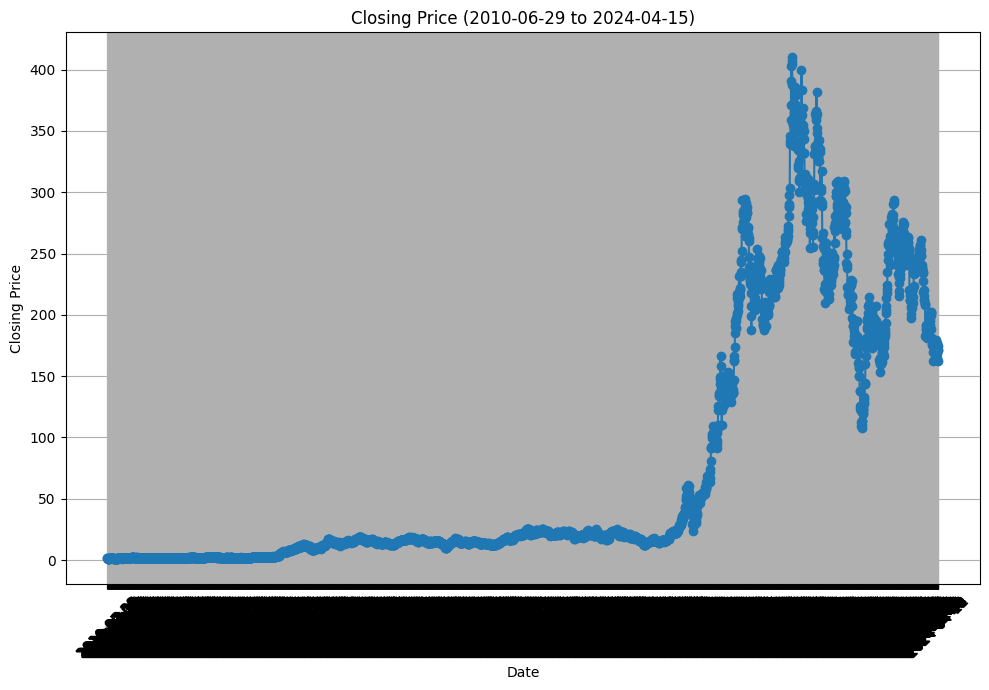

In [3]:
import matplotlib.pyplot as plt
def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    """
    Some docstrings
    """
    filtered_data = df[df['Date'] >= start]
    filtered_data = filtered_data[filtered_data['Date'] <= end]
    plt.figure(figsize=(10, 7))
    plt.plot(filtered_data['Date'], filtered_data['Close'], marker='o', linestyle='-')
    plt.title(f"Closing Price ({start} to {end})")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_close(df)

In [4]:
import statsmodels.api as sm
from datetime import timedelta
def autoregress(df: pd.DataFrame) -> float:
    """
    Some docstrings.
    """
    new_df = df.set_index('Date')
    new_df.index = pd.to_datetime(new_df.index)
    new_df = new_df.sort_values(by='Date')
    new_df['Close_diff'] = new_df['Close'].diff()
    new_df['Close_diff_shifted'] = new_df['Close_diff'].shift(1, freq=timedelta(1))
    new_df = new_df.dropna()

    x = new_df['Close_diff']
    y = new_df['Close_diff_shifted']

    model = sm.OLS(y, x).fit(cov_type='HC1')
    t_statistic = model.tvalues[0]

    return t_statistic
autoregress(df)

-0.5749294723509284

In [5]:
def autoregress_logit(df: pd.DataFrame) -> float:
    """
    Some docstrings.
    """
    new_df = df.set_index('Date')
    new_df.index = pd.to_datetime(new_df.index)
    new_df = new_df.sort_values(by='Date')
    new_df['Close_diff'] = new_df['Close'].diff()
    new_df['Close_diff_shifted'] = new_df['Close_diff'].shift(1, freq=timedelta(1))
    new_df = new_df.dropna()
    x = new_df['Close_diff']
    y = (new_df['Close_diff_shifted'] > 0).astype(int)

    model = sm.Logit(y, x).fit(disp=0)

    t_statistic = model.tvalues[0]

    return t_statistic

autoregress_logit(df)

0.9608459092701418

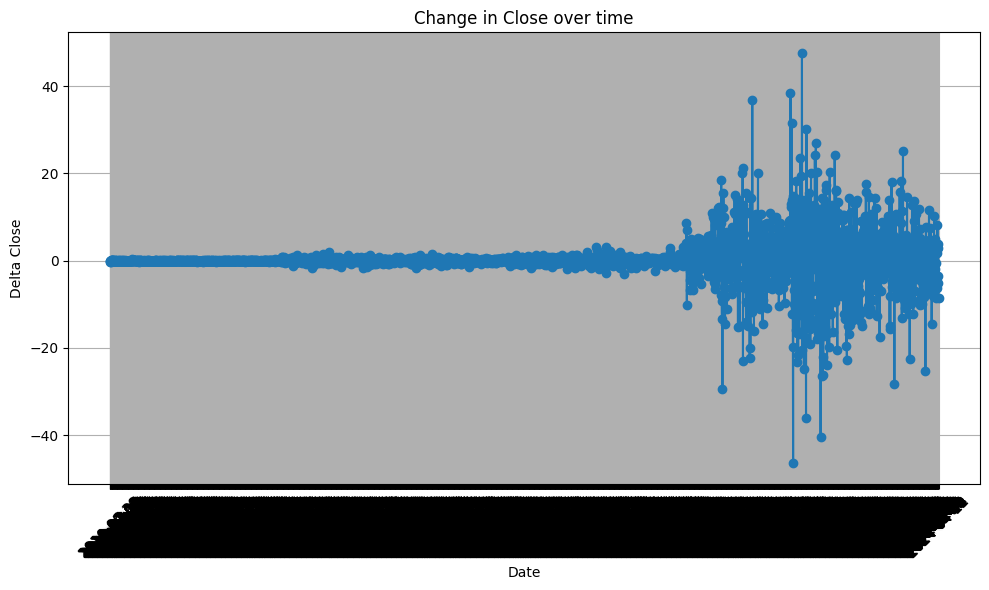

In [6]:
def plot_delta(df: pd.DataFrame) -> None:
    """
    Some docstrings.
    """
    df = df.sort_values(by='Date')
    df['Delta_Close'] = df['Close'].diff()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Delta_Close'], marker='o', linestyle='-')
    plt.title("Change in Close over time")
    plt.xlabel("Date")
    plt.ylabel("Delta Close")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_delta(df)